### Pregunta de Negocio - Analistes de Finances i Risc Crediticio

> En quina **mesura** els clients amb **saldos més baixos** estan en **més risc d'incompliment de crèdit**, i com hem d'ajustar les nostres polítiques de crèdit per mitigar aquest risc?
>

### Carga de datos

In [14]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

In [15]:
df = pd.read_csv("../Data/df.csv")

### Extracto del EDA

<Axes: >

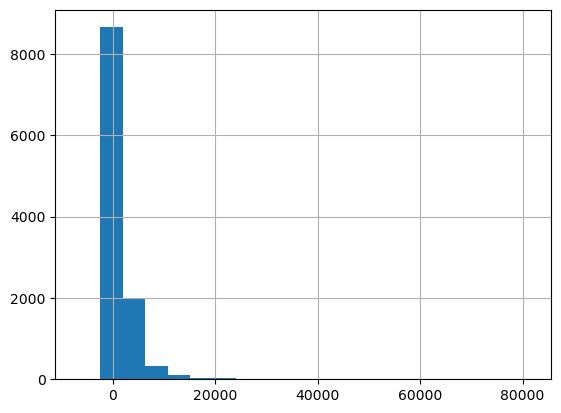

In [16]:
df['balance'].hist(bins=20)

count    11141.000000
mean      1529.583072
std       3227.835848
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1709.000000
max      81204.000000
Name: balance, dtype: float64


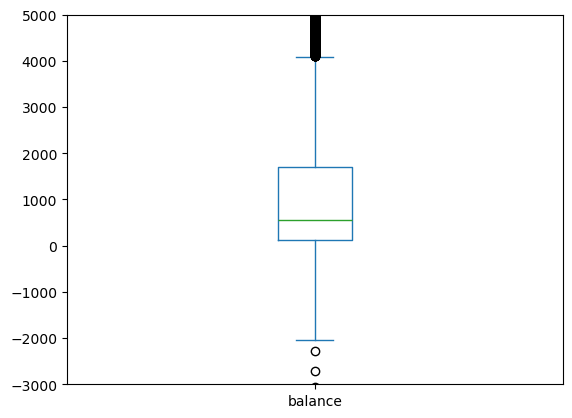

In [17]:
print(df['balance'].describe())
df['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

          count         mean          std     min     25%    50%      75%  \
deposit                                                                     
False    5860.0  1281.471331  2936.286290 -6847.0   64.75  414.0  1324.75   
True     5281.0  1804.897368  3502.996456 -3058.0  210.00  733.0  2160.00   

             max  
deposit           
False    66653.0  
True     81204.0  


<Axes: xlabel='balance', ylabel='Count'>

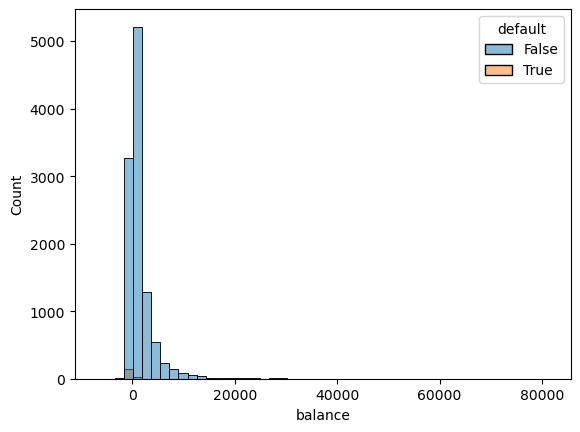

In [18]:
print(df.groupby('deposit')['balance'].describe())
sns.histplot(data=df, x='balance', hue='default', bins=50)

balance_group
0-500        3882
500-1500     2697
1500-5000    2332
Deute        1459
5000+         771
Name: count, dtype: int64


<Axes: xlabel='balance_group'>

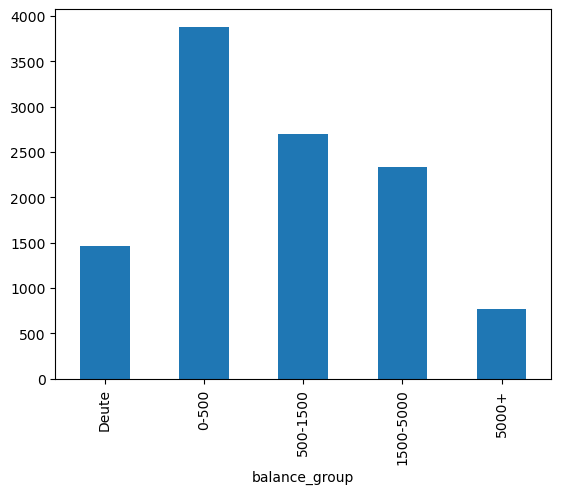

In [19]:
bins=[-7000, 0, 500, 1500, 5000, 82000]
labels=['Deute', '0-500', '500-1500', '1500-5000', '5000+']

df['balance_group'] = pd.cut(df['balance'],bins=bins, labels=labels)
print(df['balance_group'].value_counts())

df['balance_group'].value_counts().reindex(labels).plot.bar()

In [20]:
df.groupby('balance_group')['default'].value_counts()

C:\Users\fabio\AppData\Local\Temp\ipykernel_11484\4064366664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('balance_group')['default'].value_counts()


balance_group  default
Deute          False      1356
               True        103
0-500          False      3831
               True         51
500-1500       False      2685
               True         12
1500-5000      False      2331
               True          1
5000+          False       770
               True          1
Name: count, dtype: int64

### Analisis Fabio
 hice el analisis por percentiles a ver que te parece, lo agregue a tu script para que lo puedas correr y ya dejamos este archivo como definitivo sobre el que vamos a trabajar.
 En este ya uso df ( osea el limpio ) y no el original por lo que ya lo puse en el repositorio

Tasa de incumplimiento por decil de saldo:
   balance_decile  default
0               1   0.0706
1               2   0.0284
2               3   0.0135
3               4   0.0089
4               5   0.0036
5               6   0.0027
6               7   0.0072
7               8   0.0009
8               9   0.0009
9              10   0.0009


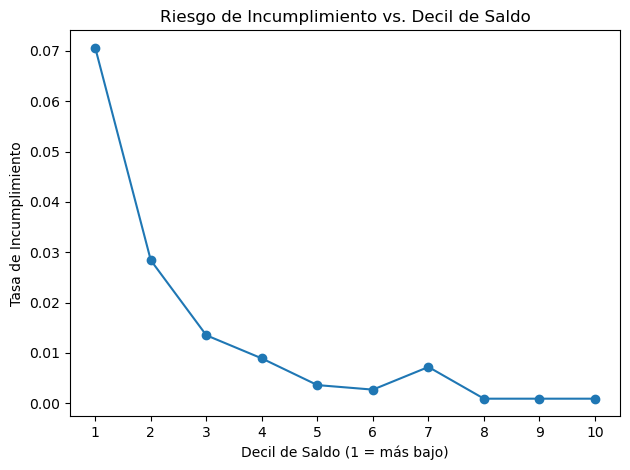

Decil 1: (-6847.001, 0.0]
Decil 2: (0.0, 62.0]
Decil 3: (62.0, 189.0]
Decil 4: (189.0, 337.0]
Decil 5: (337.0, 550.0]
Decil 6: (550.0, 863.0]
Decil 7: (863.0, 1341.0]
Decil 8: (1341.0, 2225.0]
Decil 9: (2225.0, 3899.0]
Decil 10: (3899.0, 81204.0]


In [21]:
df = pd.read_csv("../Data/df.csv")

#  Crear deciles de balance para agrupar clientes en 10 grupos iguales
df['balance_decile'] = pd.qcut(df['balance'], q=10, labels=False)

# Calcular la tasa de incumplimiento (default) por cada decil
default_rates = (df.groupby('balance_decile')['default'].mean().reset_index()) #la media aritmética en ese grupo equivale a la proporción (o tasa) de incumplimiento
default_rates['default'] = default_rates['default'].round(4) 
default_rates['balance_decile'] = default_rates['balance_decile'] + 1

#  Mostrar resultados en consola
print("Tasa de incumplimiento por decil de saldo:")
print(default_rates)

#  Graficar la relación
plt.figure()
plt.plot(default_rates['balance_decile'], default_rates['default'], marker='o')
plt.xlabel('Decil de Saldo (1 = más bajo)')
plt.ylabel('Tasa de Incumplimiento')
plt.title('Riesgo de Incumplimiento vs. Decil de Saldo')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

# Crear los bins explícitamente con qcut
df['balance_decile_range'] = pd.qcut(df['balance'], q=10)

# Obtener los intervalos únicos en orden
balance_ranges = df['balance_decile_range'].cat.categories

# Mostrar los rangos de cada decil
for i, r in enumerate(balance_ranges, start=1):
    print(f"Decil {i}: {r}")

#### Aqui calculo un indice de riesgo por cada decil para darnos una idea del riesgo contra el riesgo medio para apartir de este determinar un umbral de riesgo

In [22]:
# Calcular tasa global de incumplimiento
Tasa_global_impagos = df['default'].mean()
print(f"Tasa global de incumplimiento: {Tasa_global_impagos:.4f}")
# Calculamos el indice de riesgo por decil riesgo/riesgo global
default_rates['indice_riesgo'] = default_rates['default'] / Tasa_global_impagos
default_rates['indice_riesgo'] = default_rates['indice_riesgo'].round(2)
print(default_rates)

Tasa global de incumplimiento: 0.0151
   balance_decile  default  indice_riesgo
0               1   0.0706           4.68
1               2   0.0284           1.88
2               3   0.0135           0.90
3               4   0.0089           0.59
4               5   0.0036           0.24
5               6   0.0027           0.18
6               7   0.0072           0.48
7               8   0.0009           0.06
8               9   0.0009           0.06
9              10   0.0009           0.06
